In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
path ="/content/drive/MyDrive/YAZILIM/6 BSBI/Task3_Data_Process.csv"

In [ ]:
df = pd.read_csv(path)

In [ ]:
df.head()

,x,y
0,0.287578,1.164440
1,0.788305,-0.887802
2,0.408977,0.174131
3,0.883017,-0.217437
4,0.940467,-0.076454


In [ ]:
df.describe()

,x,y
count,25.000000,25.000000
mean,0.595560,-0.237362
std,0.300524,0.683736
min,0.042060,-1.959128
25%,0.408977,-0.647906
50%,0.640507,-0.393132
75%,0.889539,0.174131
max,0.994270,1.239426


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       25 non-null     float64
 1   y       25 non-null     float64
dtypes: float64(2)
memory usage: 532.0 bytes


In [ ]:
df.isna().sum()

,0
x,0
y,0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Define X and y from the DataFrame
X = df[['x']]
y = df['y']

In [ ]:
import statsmodels.api as sm
from statsmodels.tools import add_constant

def calculate_aic_bic(X, y, max_degree=10):
    results = []

    for degree in range(1, max_degree + 1):
        # Polinom özelliklerini oluştur
        poly = PolynomialFeatures(degree=degree, include_bias=False)
        X_poly = poly.fit_transform(X)

        # Statsmodels ile fit et (sabit terim ekle)
        X_with_const = add_constant(X_poly)
        model = sm.OLS(y, X_with_const).fit()

        results.append({
            'degree': degree,
            'AIC': model.aic,
            'BIC': model.bic,
            'R2': model.rsquared,
            'Adj_R2': model.rsquared_adj
        })

    return pd.DataFrame(results)

# AIC/BIC hesapla
results_df = calculate_aic_bic(X, y, max_degree=10)

# En küçük AIC/BIC'i bul
best_aic = results_df.loc[results_df['AIC'].idxmin()]
best_bic = results_df.loc[results_df['BIC'].idxmin()]

print("AIC'e göre en iyi derece:", best_aic['degree'])
print("BIC'e göre en iyi derece:", best_bic['degree'])
print(results_df)

AIC'e göre en iyi derece: 3.0
BIC'e göre en iyi derece: 3.0
   degree        AIC        BIC        R2    Adj_R2
0       1  44.427521  46.865272  0.342682  0.314103
1       2  45.335587  48.992214  0.370774  0.313571
2       3  24.335151  29.210655  0.749246  0.713424
3       4  24.908758  31.003137  0.763152  0.715783
4       5  26.353120  33.666375  0.768358  0.707400
5       6  26.510453  35.042584  0.784818  0.713090
6       7  28.510437  38.261444  0.784818  0.696213
7       8  28.660929  39.630812  0.800162  0.700244
8       9  29.364614  41.553373  0.810260  0.696417
9      10  31.343725  44.751359  0.810419  0.675004


In [ ]:
# -----------------------------
# 2. Fit a linear regression
# -----------------------------
lin_model = LinearRegression()
lin_model.fit(X, y)

y_pred_lin = lin_model.predict(X)
rmse_lin = np.sqrt(mean_squared_error(y, y_pred_lin))
r2_lin = r2_score(y, y_pred_lin)

In [ ]:
# -----------------------------
# 3. Fit a cubic regression
# -----------------------------
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)

cubic_model = LinearRegression()
cubic_model.fit(X_poly, y)

y_pred_cubic = cubic_model.predict(X_poly)
rmse_cubic = np.sqrt(mean_squared_error(y, y_pred_cubic))
r2_cubic = r2_score(y, y_pred_cubic)


In [ ]:
# -----------------------------
# 4. Print evaluation metrics
# -----------------------------
print("=== Linear Regression ===")
print("RMSE:", rmse_lin)
print("R²:", r2_lin)

print("\n=== Cubic Regression ===")
print("RMSE:", rmse_cubic)
print("R²:", r2_cubic)


=== Linear Regression ===
RMSE: 0.5431400231790193
R²: 0.34268166852644033

=== Cubic Regression ===
RMSE: 0.3354657196640092
R²: 0.7492456787318105


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


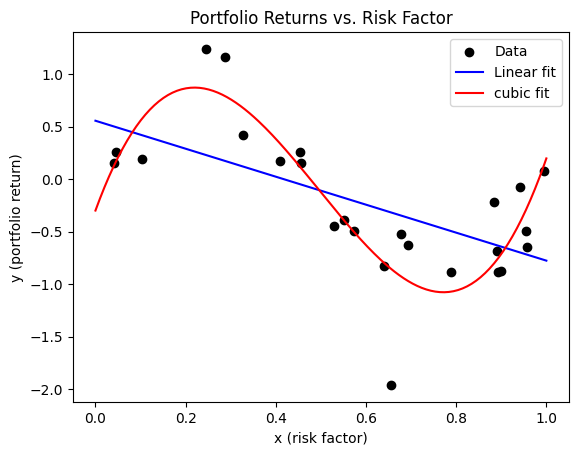

In [ ]:
# -----------------------------
# 5. Plot data + fitted curves
# -----------------------------
x_plot = np.linspace(0, 1, 200).reshape(-1, 1)
y_plot_lin = lin_model.predict(x_plot)
y_plot_cubic = cubic_model.predict(poly.transform(x_plot))

plt.scatter(X, y, color='black', label='Data')
plt.plot(x_plot, y_plot_lin, color='blue', label='Linear fit')
plt.plot(x_plot, y_plot_cubic, color='red', label='cubic fit')
plt.xlabel("x (risk factor)")
plt.ylabel("y (portfolio return)")
plt.legend()
plt.title("Portfolio Returns vs. Risk Factor")
plt.show()


In [ ]:
import statsmodels.api as sm
from statsmodels.tools import add_constant

def calculate_aic_bic(X, y, max_degree=10):
    results = []

    for degree in range(1, max_degree + 1):
        # Polinom özelliklerini oluştur
        poly = PolynomialFeatures(degree=degree, include_bias=False)
        X_poly = poly.fit_transform(X)

        # Statsmodels ile fit et (sabit terim ekle)
        X_with_const = add_constant(X_poly)
        model = sm.OLS(y, X_with_const).fit()

        results.append({
            'degree': degree,
            'AIC': model.aic,
            'BIC': model.bic,
            'R2': model.rsquared,
            'Adj_R2': model.rsquared_adj
        })

    return pd.DataFrame(results)

# AIC/BIC hesapla
results_df = calculate_aic_bic(X, y, max_degree=10)

# En küçük AIC/BIC'i bul
best_aic = results_df.loc[results_df['AIC'].idxmin()]
best_bic = results_df.loc[results_df['BIC'].idxmin()]

print("AIC'e göre en iyi derece:", best_aic['degree'])
print("BIC'e göre en iyi derece:", best_bic['degree'])
print(results_df)

AIC'e göre en iyi derece: 3.0
BIC'e göre en iyi derece: 3.0
   degree        AIC        BIC        R2    Adj_R2
0       1  44.427521  46.865272  0.342682  0.314103
1       2  45.335587  48.992214  0.370774  0.313571
2       3  24.335151  29.210655  0.749246  0.713424
3       4  24.908758  31.003137  0.763152  0.715783
4       5  26.353120  33.666375  0.768358  0.707400
5       6  26.510453  35.042584  0.784818  0.713090
6       7  28.510437  38.261444  0.784818  0.696213
7       8  28.660929  39.630812  0.800162  0.700244
8       9  29.364614  41.553373  0.810260  0.696417
9      10  31.343725  44.751359  0.810419  0.675004
